# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
diabetes_df = pd.read_csv('diabetes.csv')

In [270]:
diabetes_df.shape

(768, 9)

In [389]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [272]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [273]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

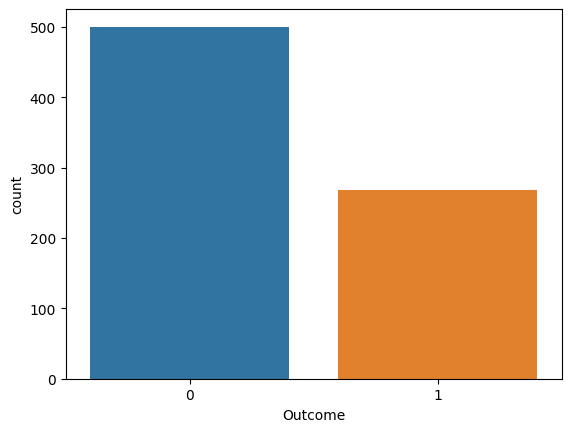

In [395]:
# checking the balance of outcomes

sns.countplot(data=diabetes_df, x='Outcome')

/Users/dhruvinandipara/anaconda3/envs/test_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


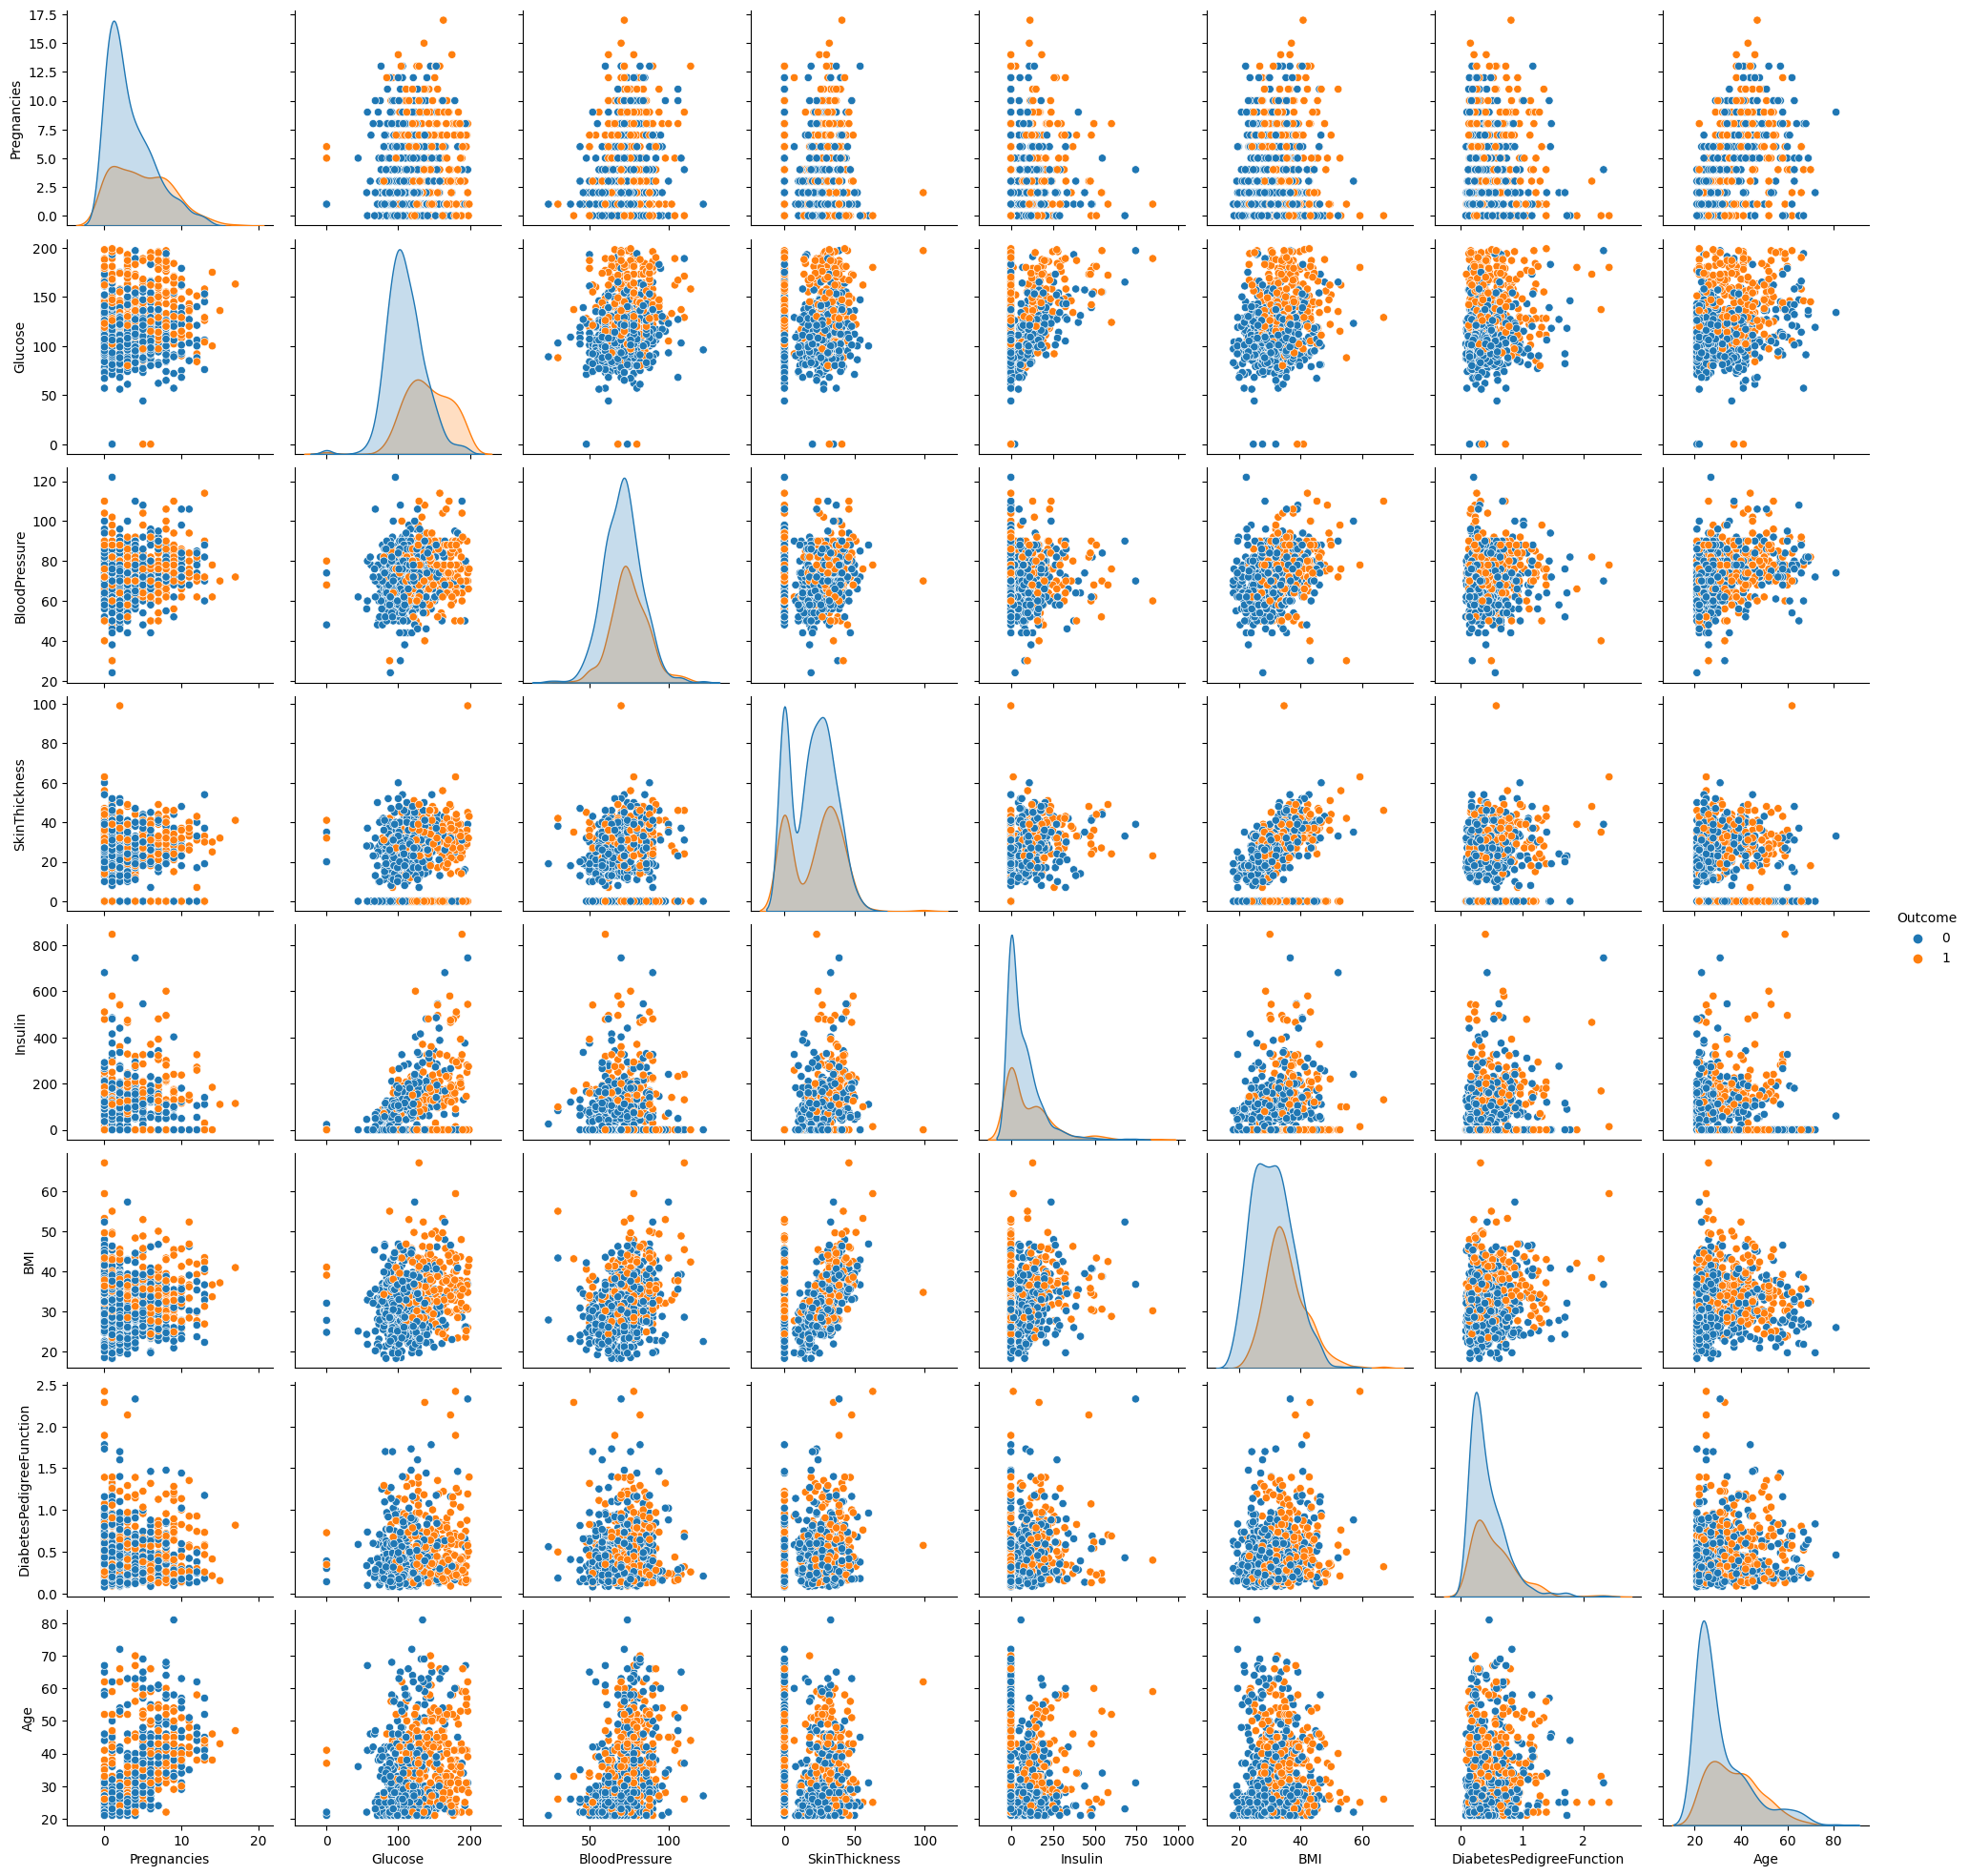

In [385]:
sns.pairplot(data=diabetes_df, hue='Outcome')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

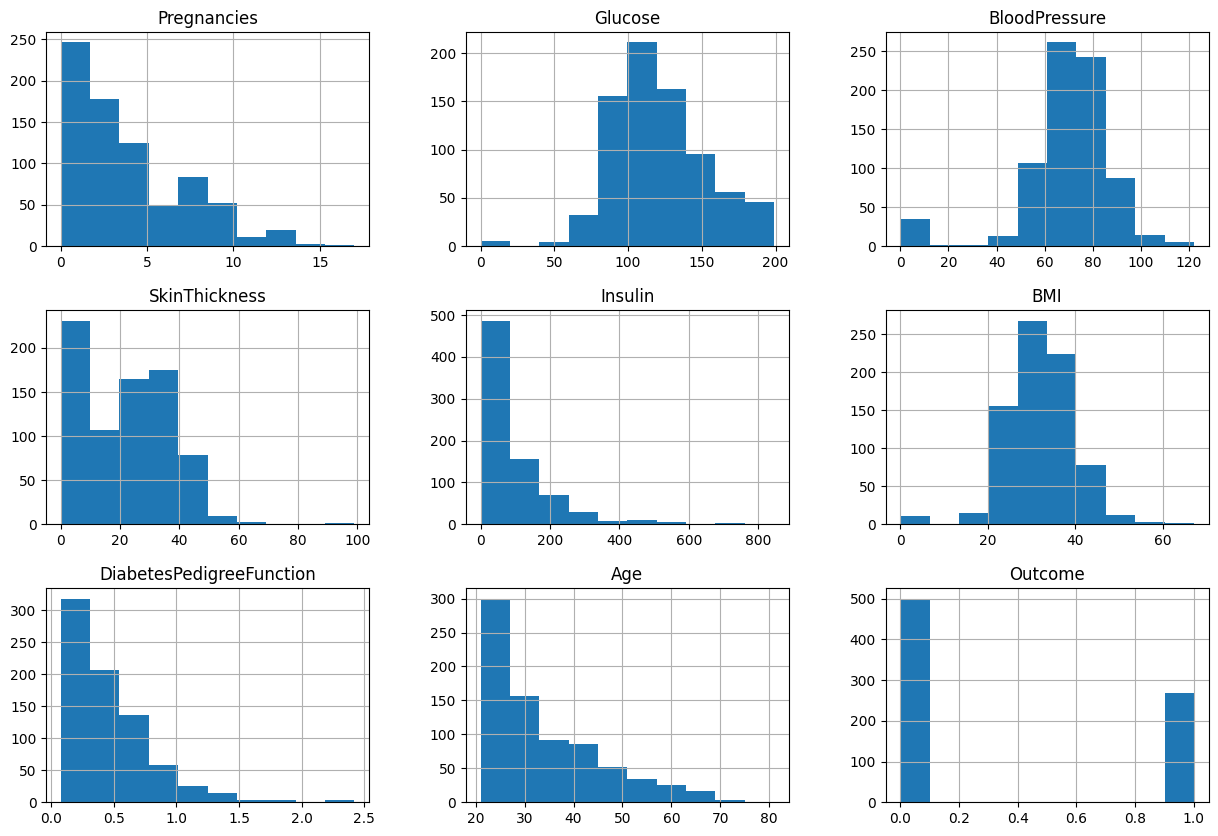

In [ ]:
# analyzing how data is distributed

diabetes_df.hist(figsize=(15,10))

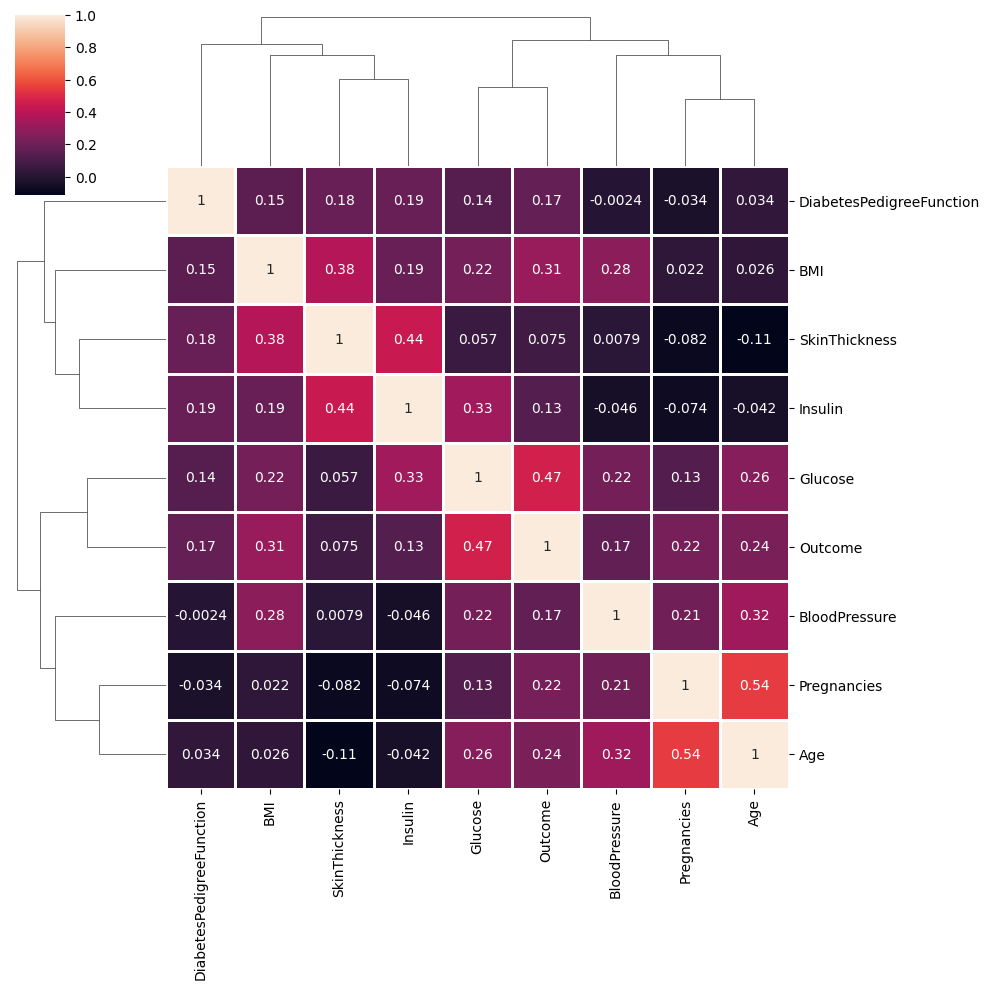

In [384]:
# creating cluster map to identify correlation between variables and to understand how different column are similar to each other
 
corr_matrix = diabetes_df.corr()
sns.clustermap(corr_matrix, annot=True, linewidths=1)

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

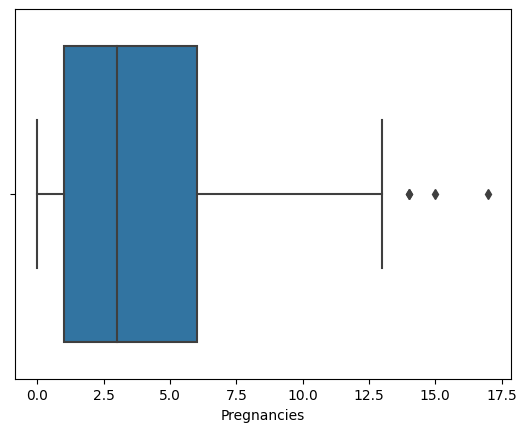

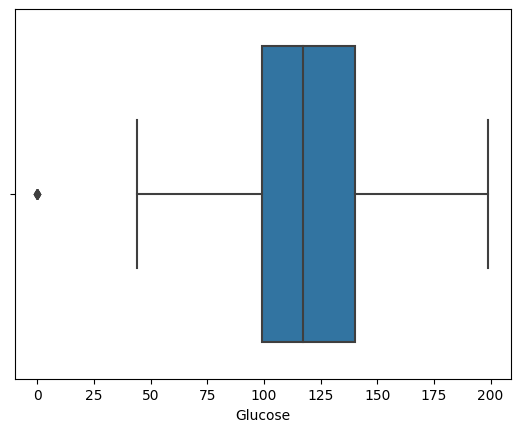

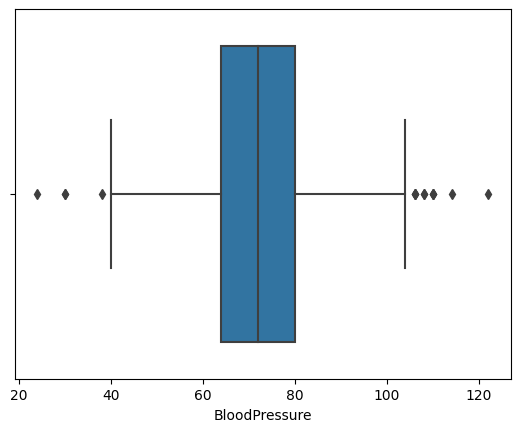

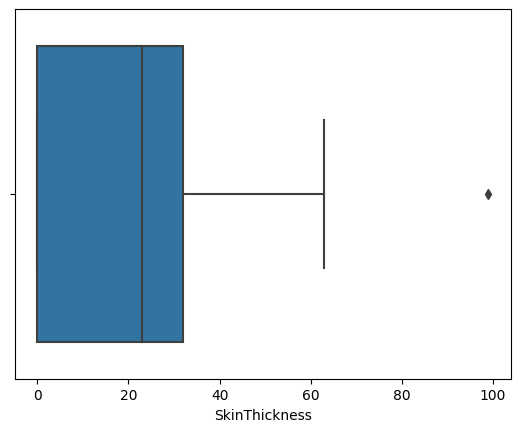

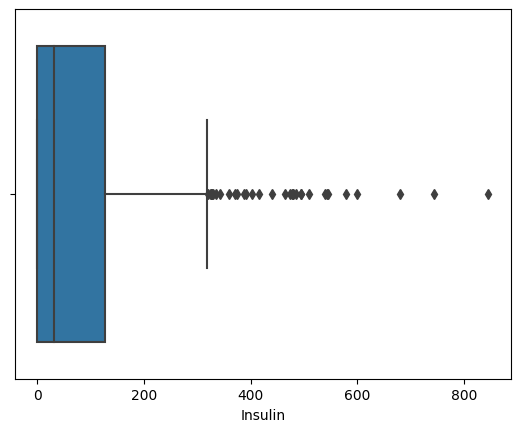

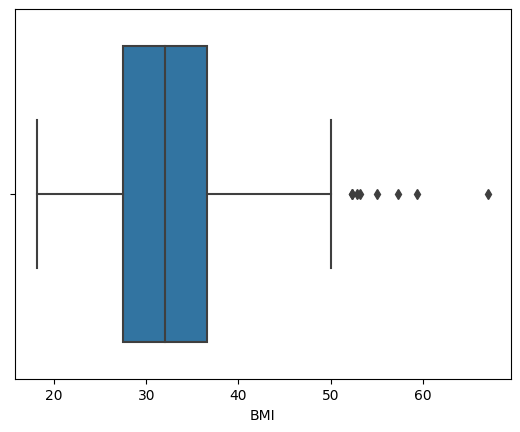

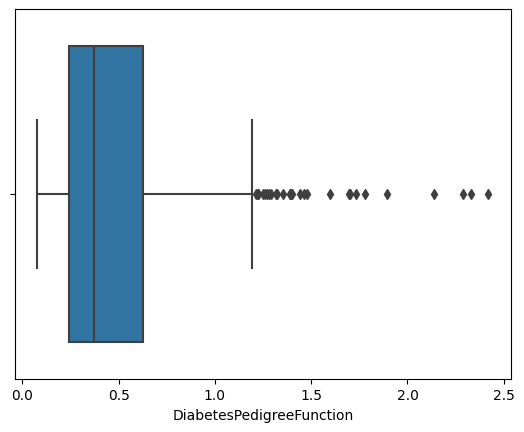

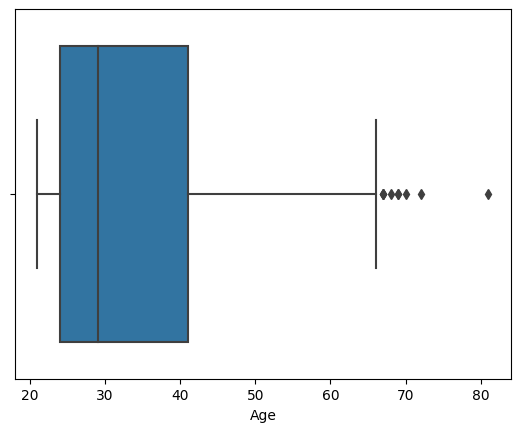

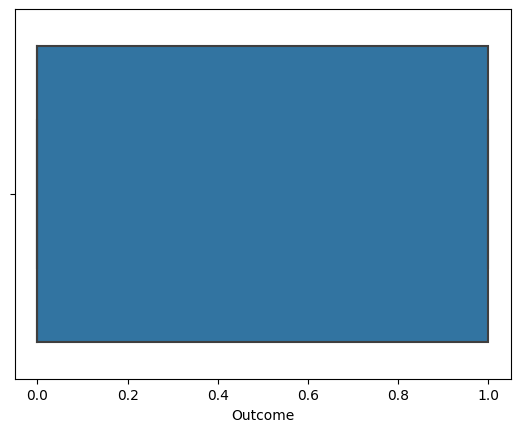

In [401]:
# analyzing outliers

# since this is health data, outliers maight be playing a crucial role. 
# Instead of removing them we will try to use algorithms in future that are less sensetive to outliers

for column in diabetes_df.columns:
    plt.figure()
    sns.boxplot(diabetes_df, x=column)

In [280]:
# replacing the 0 blood presure with the median values 

diabetes_df.loc[diabetes_df['BloodPressure'] == 0, 'BloodPressure'] = diabetes_df['BloodPressure'].median()

In [281]:
# replacing BMI 0 with median values

diabetes_df.loc[diabetes_df['BMI'] == 0, 'BMI'] = diabetes_df['BMI'].median()

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

In [283]:
# setting features and targets
X = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df['Outcome']

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

### Training model with the Decision tree

In [373]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=9, stratify=y)

In [374]:
from sklearn.pipeline import Pipeline

# builiding pipeline to scale data and use decision tree classifier for modal building

pipe1 = Pipeline([
                ('scaler', RobustScaler()),
                ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=9))
                 ])

pipe1.fit(X_train, y_train)

y_pred_gini = pipe1.predict(X_test)

print('model score with gini index {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

model score with gini index 0.7186


In [375]:
print('training score - ', pipe1.score(X_train,y_train))
print('testing score - ', pipe1.score(X_test, y_test))

training score -  0.7467411545623837
testing score -  0.7186147186147186


### Training model with the Random forest

In [287]:
from sklearn.ensemble import RandomForestClassifier


In [379]:
# creating pipline to scale data and use random forest classifier

pipe2 = Pipeline([
                ('scaler', RobustScaler()),
                ('classifier', RandomForestClassifier(n_estimators=4, max_depth=5, random_state=9))
                ])


In [380]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=4,
                                        random_state=9))])

In [381]:
y_pred = pipe2.predict(X_test)

In [382]:
print('model score with 100 decision trees is {0:0.04}'. format(accuracy_score(y_test,y_pred)))

model score with 100 decision trees is 0.7662


In [383]:
print('training score - ', pipe2.score(X_train, y_train))
print('testing score - ', pipe2.score(X_test, y_test))

training score -  0.8268156424581006
testing score -  0.7705627705627706


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* It can be said that random forest method provides slightly better score than using decision tree despite some over fitting

* Random forest modal will be able to predict accuractly on average of 74 time out of 100

* Whereas using decision tree is able to generalize better then random forest but has slightly lower accuracy

* Overall decision tree could be a better fit for out case since it is able to generalize better then random forestand likely to continue to be stable on unseen data

